<h1 style="color:blue; background:lightgreen; line-height:3; text-align:center; font-family:Arial Black">BIG MART SALES ANALYSIS & PREDICTION</h1>
<h3 style="color:purple;">BY: Suraj Honkamble</h3>

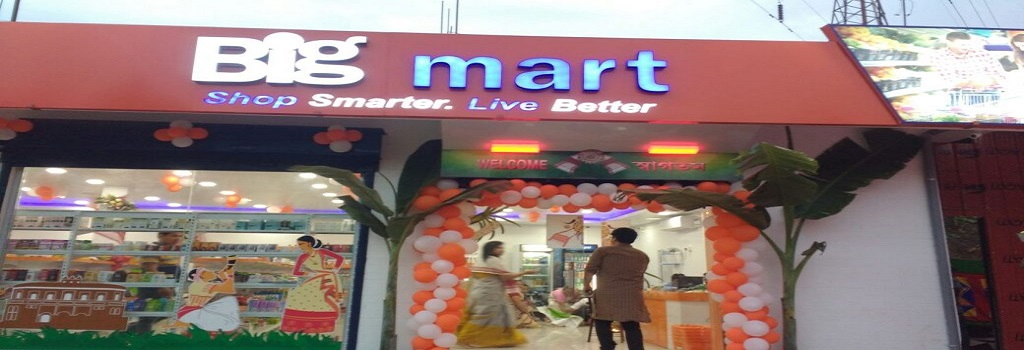

<h2 style="color:blue; background:lightblue; line-height:2;">Description</h2>
<h3 style="color:green; line-height:1.5;">The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.</h3>
 
<h2 style="color:blue; background:lightblue; line-height:2;">Data Description</h2>
<h3 style="color:green; line-height:1.5;">Data Contains 2 sets of dataset one os training and another set is for testing purpose. The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.<br>
    <b style="color:red">1. Item_Identifier::</b> Unique Item or Product Number.<br>
    <b style="color:red">2. Item_Weight ::</b> Weight of Item or Product in grams.<br>
    <b style="color:red">3. Item_Fat_Content ::</b> Fat Content Category viz, Low and Regular.<br>
    <b style="color:red">4. Item_Visibility ::</b> Item visibility is the ability of products to be discovered, recognized, and interacted with by customers. Low means less visibility to customers.<br>
    <b style="color:red">5. Item_Type ::</b> Type of the product.<br>
    <b style="color:red">6. Item_MRP ::</b> Original or printed price of the product.<br>
    <b style="color:red">7. Outlet_Identifier ::</b> Unique identifier assigned to each outlet or store.<br>
    <b style="color:red">8. Outlet_Establishment_Year ::</b> Year in which a retail outlet was established or opened.<br>
    <b style="color:red">9. Outlet_Size ::</b> Refers to the size or capacity of a retail outlet or store, include labels like "Small," "Medium," or "Large."<br>
    <b style="color:red">10. Outlet_Location_Type ::</b> Category of location where a retail outlet is situated. They are Tier-1:urban or metropolitan areas, Tier-2:Semi-urban and Tier-3: Rural Area.<br>
    <b style="color:red">11. Outlet_Type ::</b> Refers to the type or category of the retail outlet.<br>
    <b style="color:red">12. Item_Outlet_Sales ::</b> Represents the sales of a specific item in a particular outlet. This is our Target variable.</h3>
    
<h2 style="color:blue; background:lightblue; line-height:2;">Project WorkFlow</h2>
<h3 style="color:green; line-height:1.5;">1).Problem Statement<br>
2).Hypothesis Generation<br>
3).Loading Packages and Data<br>
4).Data Structure and Content<br>
5).Exploratory Data Analysis, Univariate, Bivariate, Multivarite Analysis.<br>
6).Missing Value Treatment<br>
7).Feature Engineering<br>
8).Encoding Categorical Variables, Label Encoding, One Hot Encoding<br>
9).PreProcessing Data<br>
10).Modeling<br>
11).Hyperparameter Tuning<br>
12).Summary.</h3>

<h2 style="color:blue; background:lightblue; line-height:2;">Hypothesis Generation</h2>
<h3 style="color:green; line-height:1.5;">1. Is there any significant difference in sales between different locations?<br>
2. Does the size of a store has impact on sales?<br>
3. Is there any relationship between product visibility and sales?<br>
4. Is there any significant correlation between the weight of an item and its sales?<br>
5. Does the fat content in the item has positive impact on the sales?<br>
6. Is outlet type (market store size) has significance impact on sales?<br>
7. Is this statement true, Older the store higher the sales?<br>
8. Is Item type affect the sales?<br>
9. Item having high price producing huge amount sales?<br>
10. Customers like to buy cheap cost of product?<br>
11. Is there any huge difference between all 10 stores?<br>
12. Does all 10 stores selling all available products in their store?</h3>

<h2 style="color:blue; background:pink; line-height:2;">Import Basic required packages and libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<h2 style="color:blue; background:pink; line-height:2;">Load Training Dataset</h2>

In [2]:
train=pd.read_csv("Data/train.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<h2 style="color:blue; background:pink; line-height:2;">Understand the data</h2>

In [3]:
train.shape

(8523, 12)

In [4]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<h2 style="color:blue; background:pink; line-height:2;">Duplicate Rows</h2>

In [6]:
train.duplicated().sum()

0

<h2 style="color:blue; background:pink; line-height:2;">Missing Values</h2>

In [7]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<h2 style="color:blue; background:pink; line-height:2;">Descriptive Statistics</h2>

In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [9]:
train.describe(include="object").T

,count,unique,top,freq
Item_Identifier,8523,1559,FDW13,10
Item_Fat_Content,8523,5,Low Fat,5089
Item_Type,8523,16,Fruits and Vegetables,1232
Outlet_Identifier,8523,10,OUT027,935
Outlet_Size,6113,3,Medium,2793
Outlet_Location_Type,8523,3,Tier 3,3350
Outlet_Type,8523,4,Supermarket Type1,5577


In [10]:
cat_col=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for col in cat_col:
    print(f"Column Name = {col} \nUnique Value Count = {train[col].nunique()} \nUnique Values = {train[col].unique()}")
    print("**"*20)
    print()

Column Name = Item_Fat_Content 
Unique Value Count = 5 
Unique Values = ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
****************************************

Column Name = Item_Type 
Unique Value Count = 16 
Unique Values = ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
****************************************

Column Name = Outlet_Identifier 
Unique Value Count = 10 
Unique Values = ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
****************************************

Column Name = Outlet_Size 
Unique Value Count = 3 
Unique Values = ['Medium' nan 'High' 'Small']
****************************************

Column Name = Outlet_Location_Type 
Unique Value Count = 3 
Unique Values = ['Tier 1' 'Tier 3' 'Tier 2']
****************************************

Column Name = Outlet_Type 

<h2 style="color:blue;">Basic Observation:</h3>
<h3 style="color:purple;line-height:1.5">1. Training dataset contains 8523 rows and 12 columns.<br>
    2. Data type of all the columns is accurate, no need to change data type of any column.<br>
    3. Zero duplicate records found in dataset.<br>
    4. Item_Weight column contains 1463 and Outlet_Size containd 2410 missing values.<br>
    5. Average weight of all item is 12.85 grams, minimum weight is 4.55 and maximum weight of the item is 21.35 grams.<br>
    6. Mean item visibility value is 0.066, minimum visibility value is 0 and maximum visibility value is 0.32.<br>
    7. Average price of the item is 140.99 Dollar, minimum price is 31.29 dollar and maximum item price is 266.88 dollar.<br>
    8. Oldest operating store is established in the year of 1985 and newest store is in the year 2009.<br>
    9. Average outlet sale is 2181.28 Dollar, minimum sale is 33 Dollar and maximum sale is 13086 Dollar.<br>
    10. Dataset contains 1559 unique Items or Projects.<br>
    11. Item_Fat_Content column consist of only 2 category, Low Fat and Regular. Might be data entry operator has entered same values with different style.<br>
    12. There are total 16 unique type of Items are kept in stores to sell.<br>
    13. Outlet_Identifier is nothing but the Store Identifier, and there are 10 different stores.<br>
    14. Outlet_Size is actually refereing to store size, there are three different store size, medium, small and high. Also this column contains missing value.<br>
    15. Stores are located in three different location category, Tier-1 reffers to Urban, Tier-2 semi-urban and Tier-3 Rural Area.<br>
    16. Dataset contains Four different oulet or store types, SuperMarket-1,2,3 and Grocery Store.</h3>

<h2 style="color:blue; background:lightblue; line-height:2;">Exploratory Data Analysis</h2>
<h3 style="color:blue; background:pink; line-height:2;">Univariate Analysis:</h3>

<h3 style="color:red; background:lightgreen; line-height:2">Number of Unique Items and top 10 Items sold most of times?</h3>

In [11]:
def value_label(x_value, y_value):
    for i in range(len(x_value)):
        plt.annotate(y_value[i],(i,y_value[i]), ha='center', fontsize=15, color='red')

In [12]:
train['Item_Identifier'].nunique()

1559

<Axes: title={'center': 'Top 10 most selling product'}, ylabel='Item_Identifier'>

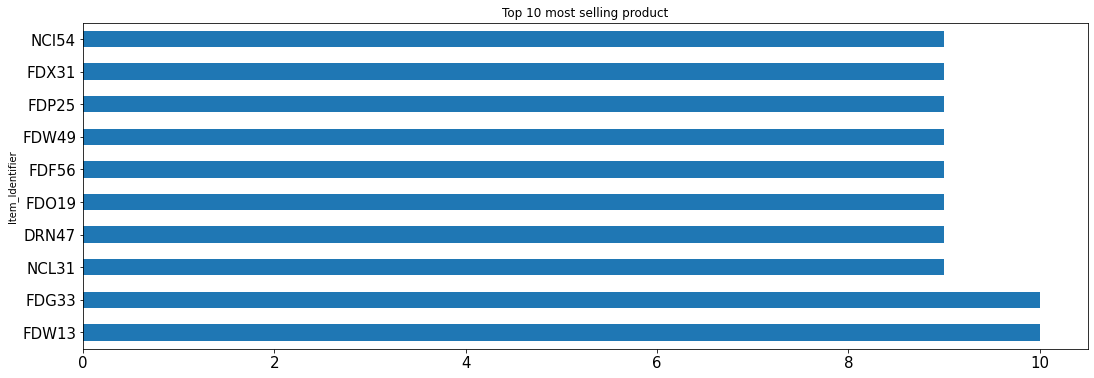

In [13]:
train['Item_Identifier'].value_counts().sort_values(ascending=False)[:10].plot(kind='barh', 
                                                                               figsize=(18,6), 
                                                                               title="Top 10 most selling product",
                                                                              fontsize=15)

<h3 style="color:purple;line-height:1.5">Dataset contains 1559 unique Items, FDG33 and FDW13 Items contributing most times in the sales.</h3>

<h3 style="color:red; background:lightgreen; line-height:2">Types of Item Fat Content and count of each category</h3>

In [14]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

### For the same category of fat content multiple names are used, so lets change these name.

In [3]:
train['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}, inplace=True)

Item_Fat_Content
Low Fat    64.730729
Regular    35.269271
Name: count, dtype: float64


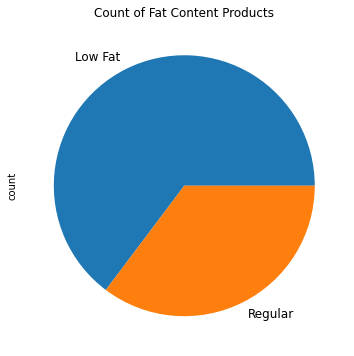

In [16]:
print(train['Item_Fat_Content'].value_counts()/len(train)*100)
train['Item_Fat_Content'].value_counts().plot(kind='pie',
                                              title="Count of Fat Content Products", 
                                              figsize=(12,6), fontsize=12);

<h3 style="color:purple;line-height:1.5">Out of total 8523 products, 64.73% of Items containd Low Fat and 35.26% Items are rich in Fat.</h3>

<h3 style="color:red; background:lightgreen; line-height:2">Types of Item avaialable in stores</h3>

In [17]:
print("Total Unique Items", train['Item_Type'].nunique())
print("Unique Items", train['Item_Type'].unique())

Total Unique Items 16
Unique Items ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


In [18]:
train['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

<h3 style="color:purple;line-height:1.5">Most of the Items are of Fruits and Vegitables category then followed by Snacks Food.</h3>

<h3 style="color:red; background:lightgreen; line-height:2">Total unique number of Outlets or Stores</h3>

In [19]:
print("Total number of outlets/stores", train['Outlet_Identifier'].nunique())
print("Outlets/stores Code", train['Outlet_Identifier'].unique())

Total number of outlets/stores 10
Outlets/stores Code ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


In [20]:
train['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

<h3 style="color:purple;line-height:1.5">Dataset contains 10 different outlets/stores information. Almost all outlets/store appearing same number of time in dataset except 2 outlets, OUT010 and OUT019.</h3>

<h3 style="color:red; background:lightgreen; line-height:2">Types of Outlet or Store size.</h3>

In [21]:
print("Total number of unique outlet size", train['Outlet_Size'].nunique())
print("Outlets/stores size", train['Outlet_Size'].unique())

Total number of unique outlet size 3
Outlets/stores size ['Medium' nan 'High' 'Small']


In [22]:
print(train['Outlet_Size'].value_counts())
print("=="*20)
print(train['Outlet_Size'].value_counts()/len(train)*100)

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64
Outlet_Size
Medium    32.770151
Small     28.018303
High      10.935117
Name: count, dtype: float64


<h3 style="color:purple;line-height:1.5">Total 32.77% of data belongs to Medium Size Outlet or shop, 28% belongs to Small size and 10.93% belongs to High or large size outlets or store.</h3>

<h3 style="color:red; background:lightgreen; line-height:2">Outlet Establish Year</h3>

In [23]:
print("Total number of unique Outlet Establishment Year", train['Outlet_Establishment_Year'].nunique())
print("Outlet_Establishment_Year", train['Outlet_Establishment_Year'].unique())

Total number of unique Outlet Establishment Year 9
Outlet_Establishment_Year [1999 2009 1998 1987 1985 2002 2007 1997 2004]


<h3 style="color:purple;line-height:1.5">There are total 9 unique Years when the Outlets or Stores are Established. Oldest store is established in 1985 and newest established store is in the year 2009.</h3>

<h3 style="color:red; background:lightgreen; line-height:2">Different types of Outlets or Stores.</h3>

In [24]:
print("Total number of unique Outlet_Types", train['Outlet_Type'].nunique())
print("Outlet_Types", train['Outlet_Type'].unique())

Total number of unique Outlet_Types 4
Outlet_Types ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


<h3 style="color:purple;line-height:1.5">There are 4 different types of Stores/Outlets viz. SuperMarket-1,2,3 and Grocery stores.</h3>

<h3 style="color:red; background:lightgreen; line-height:2">Types of Location where the Outlets or Stores are established.</h3>

In [25]:
print("Total number of unique Outlet_Location_Type", train['Outlet_Location_Type'].nunique())
print("Outlet_Location_Type", train['Outlet_Location_Type'].unique())

Total number of unique Outlet_Location_Type 3
Outlet_Location_Type ['Tier 1' 'Tier 3' 'Tier 2']


<h3 style="color:purple;line-height:1.5">These Outlets situated in 3 different areas viz. Tier-1: Urban Area, Tier-2: Semi-Urban Area and Tier-2: Rural Area.</h3>

<h3 style="color:red; background:lightgreen; line-height:2">Analysing Numerical Columns(Distribution of data)</h3>

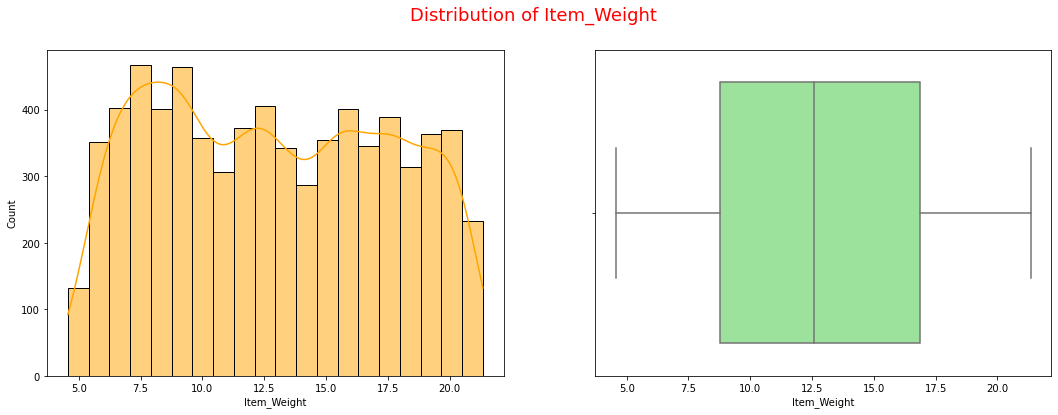

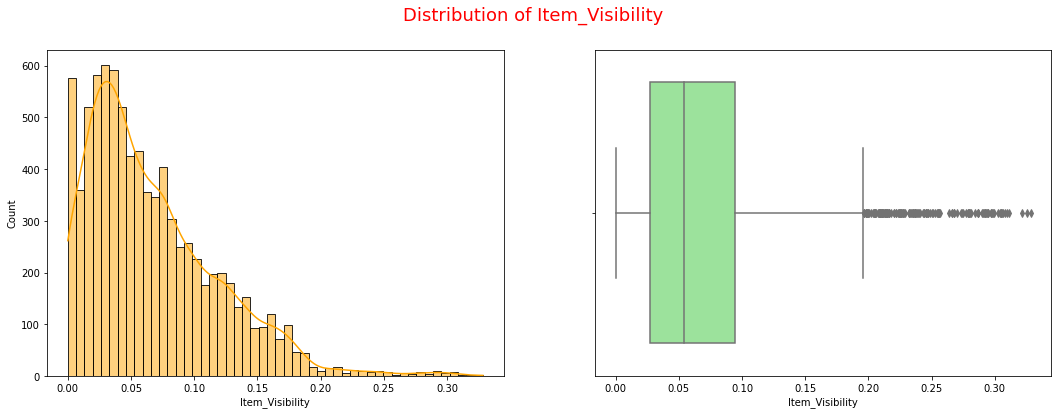

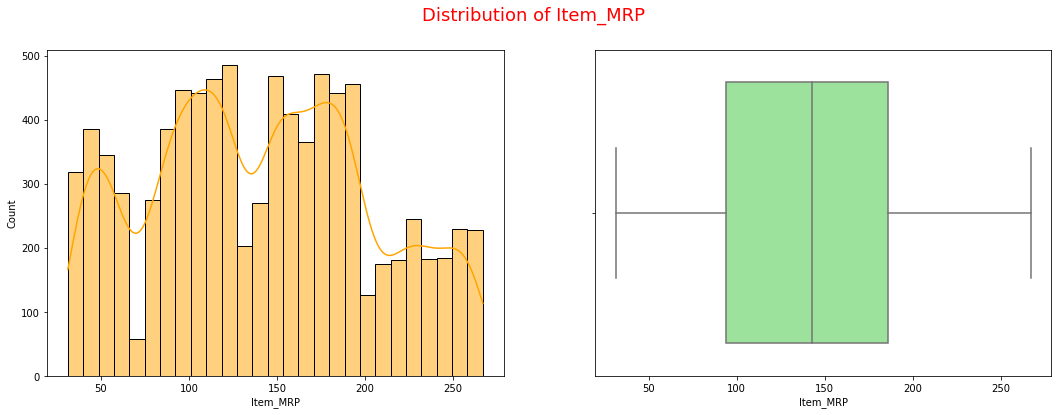

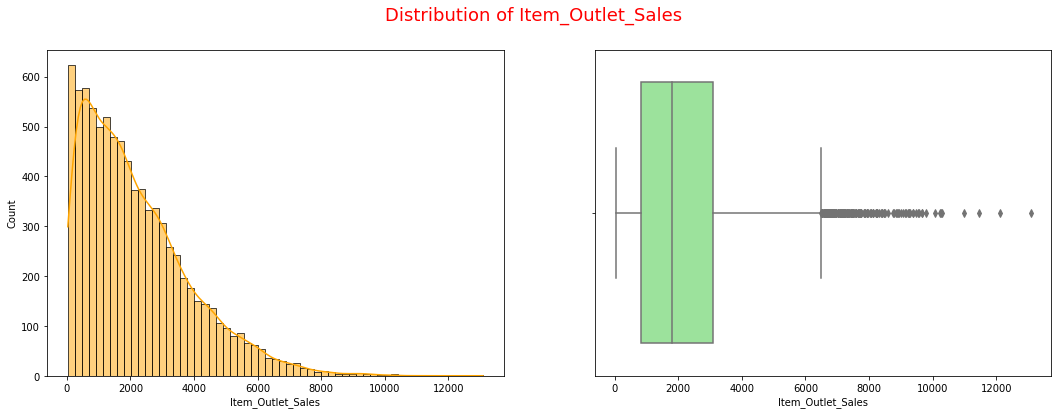

In [26]:
num_col=['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

for col in num_col:
    plt.figure(figsize=(18,6))
    plt.subplot(121)
    sns.histplot(x=col, data=train, color='orange', kde=True)
    
    plt.subplot(122)
    sns.boxplot(x=col, data=train, color='lightgreen')
    plt.suptitle(f"Distribution of {col}", fontsize=18, color="red");

<h2 style="color:blue;">Univariate Observations:</h2>
<h3 style="color:purple;line-height:1.5">1. Dataset contains 1559 unique Items, FDG33 and FDW13 Items are contributing most(10) times in the sales.<br>
    2. Out of total 8523 products, 64.73% of Items containd Low Fat and 35.26% Items are rich in Fat.<br>
    3. Most of the Items are of Fruits and Vegitables category then followed by Snacks Food.<br>
    4. Dataset contains 10 different outlets/stores information. Almost all outlets/store appearing same number of time in dataset except 2 outlets, OUT010 and OUT019.<br>
    5. Total 32.77% of data belongs to Medium Size Outlet or shop, 28% belongs to Small size and 10.93% belongs to High or large size outlets or store.<br>
    6. There are total 9 unique Years when the Outlets or Stores are Established. Oldest store is established in 1985 and newest established store is in the year 2009.<br>
    7. There are 4 different types of Stores/Outlets viz. SuperMarket-1,2,3 and Grocery stores. These Outlets situated in 3 different areas viz. Tier-1: Urban Area, Tier-2: Semi-Urban Area and Tier-2: Rural Area.<br>
    8. Item_Visibility and Oulet_Sales columns are Right Skewed. Item_Weight and Item_MRP columns are partialy Uniform Distributed.</h3>

<h3 style="color:blue; background:pink; line-height:2;">Bivariate Analysis:</h3>

<h3 style="color:red; background:lightgreen; line-height:2">Relationship Between Item Weight and Other Item related categorical columns</h3>

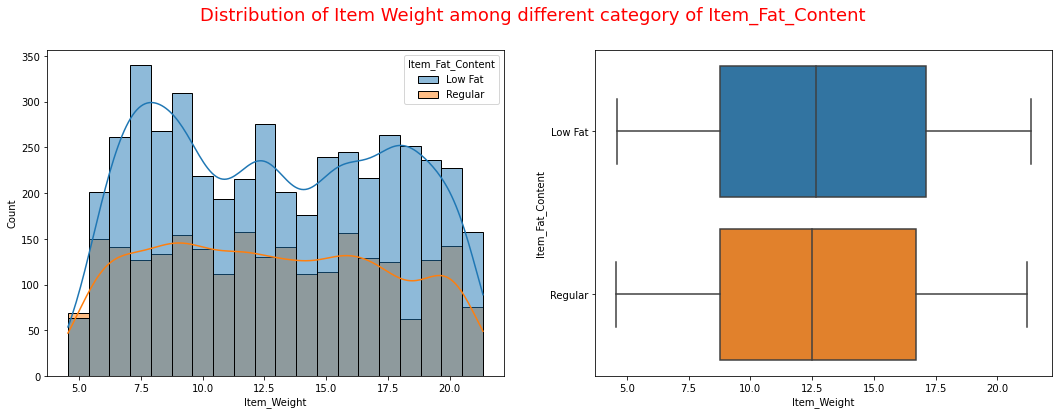

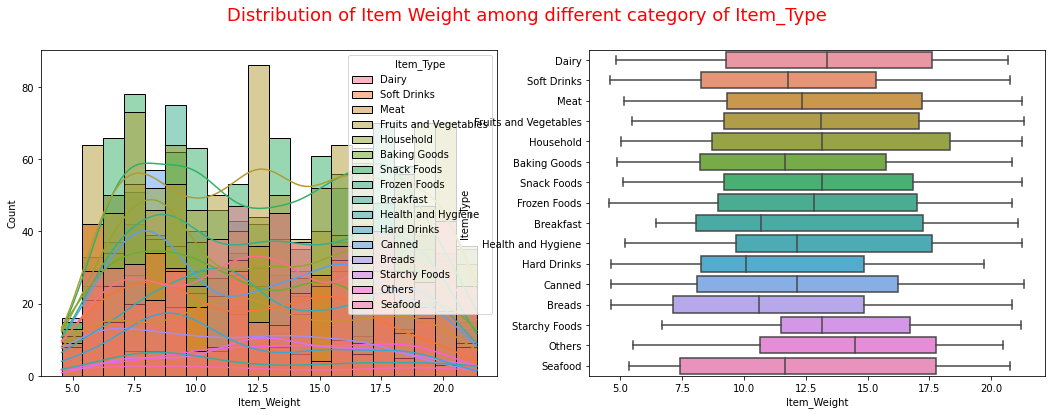

In [27]:
cat_col=['Item_Fat_Content', 'Item_Type']

for col in cat_col:
    plt.figure(figsize=(18,6))
    plt.subplot(121)
    sns.histplot(x="Item_Weight", data=train, hue=col, kde=True)
    
    plt.subplot(122)
    sns.boxplot(y=col, x='Item_Weight', data=train)
    plt.suptitle(f"Distribution of Item Weight among different category of {col}", fontsize=18, color="red");

<h3 style="color:red; background:lightgreen; line-height:2">Relationship Between Item Weight and Item Type</h3>

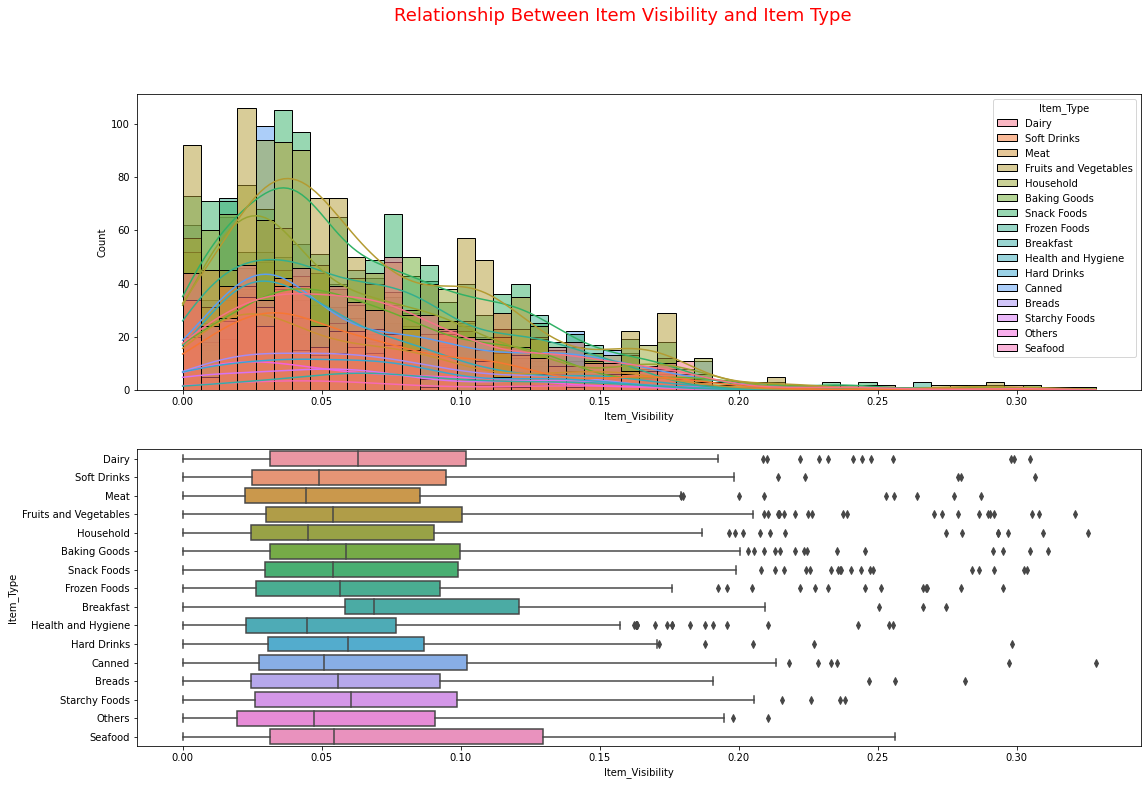

In [28]:
plt.figure(figsize=(18,12))
plt.subplot(211)
sns.histplot(x="Item_Visibility", data=train, hue='Item_Type', kde=True)
    
plt.subplot(212)
sns.boxplot(y='Item_Type', x='Item_Visibility', data=train)
plt.suptitle(f"Relationship Between Item Visibility and Item Type", fontsize=18, color="red");

<h3 style="color:red; background:lightgreen; line-height:2">Relationship Between Item Weight, Item Visibility, Item MRP</h3>

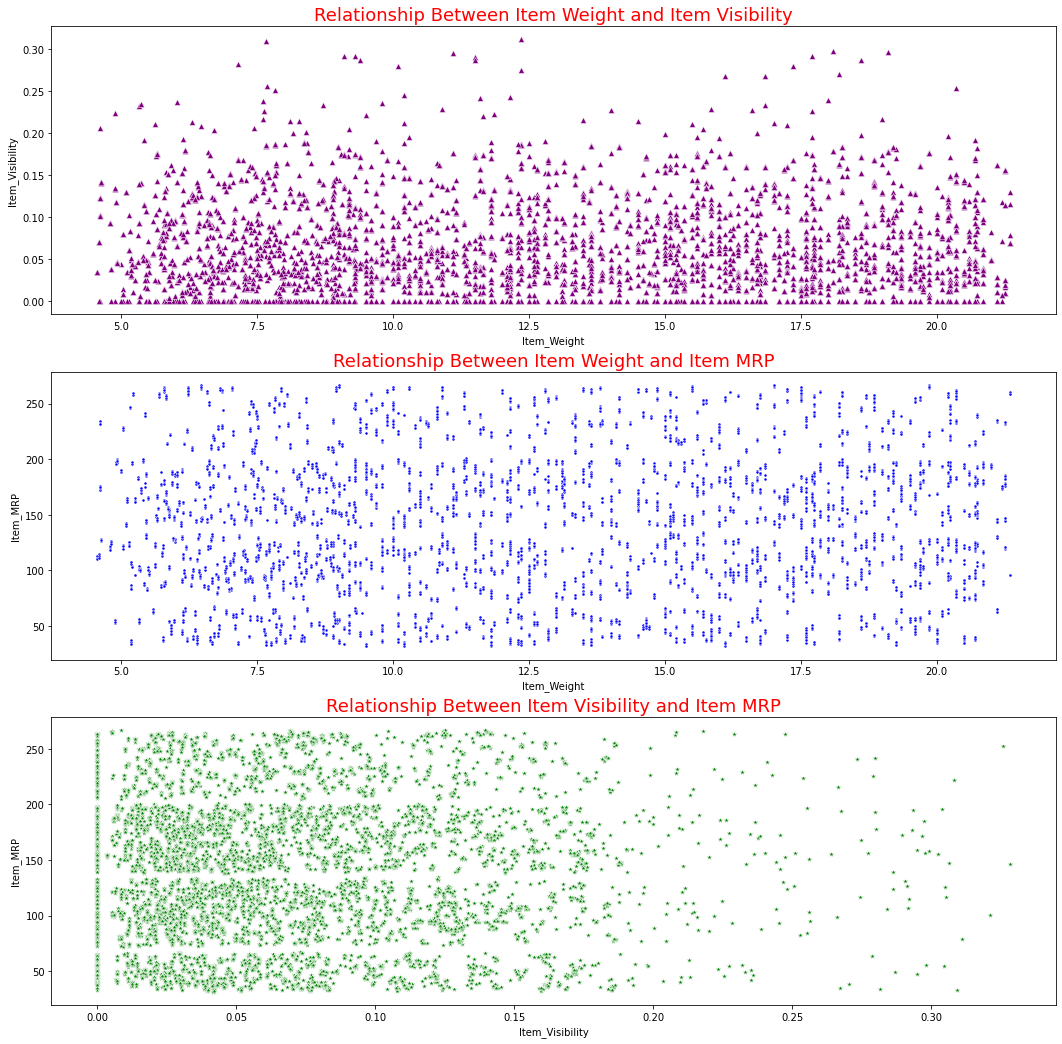

In [29]:
plt.figure(figsize=(18,18))
plt.subplot(311)
sns.scatterplot(x='Item_Weight', y='Item_Visibility', data=train, marker='^', color='purple');
plt.title("Relationship Between Item Weight and Item Visibility", fontsize=18, color='red')

plt.subplot(312)
sns.scatterplot(x='Item_Weight', y='Item_MRP', data=train, marker='.', color='blue');
plt.title("Relationship Between Item Weight and Item MRP", fontsize=18, color='red')

plt.subplot(313)
sns.scatterplot(x='Item_Visibility', y='Item_MRP', data=train, marker='*', color='green');
plt.title("Relationship Between Item Visibility and Item MRP", fontsize=18, color='red');

<h3 style="color:red; background:lightgreen; line-height:2">Relationship Between Item Outlet Sales, Item Weight, Item Visibility and Item MRP.</h3>

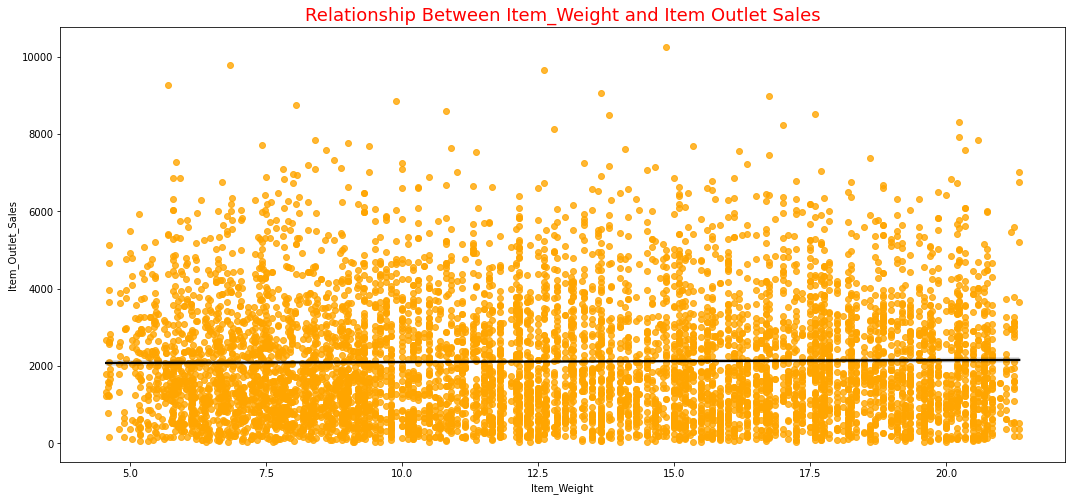

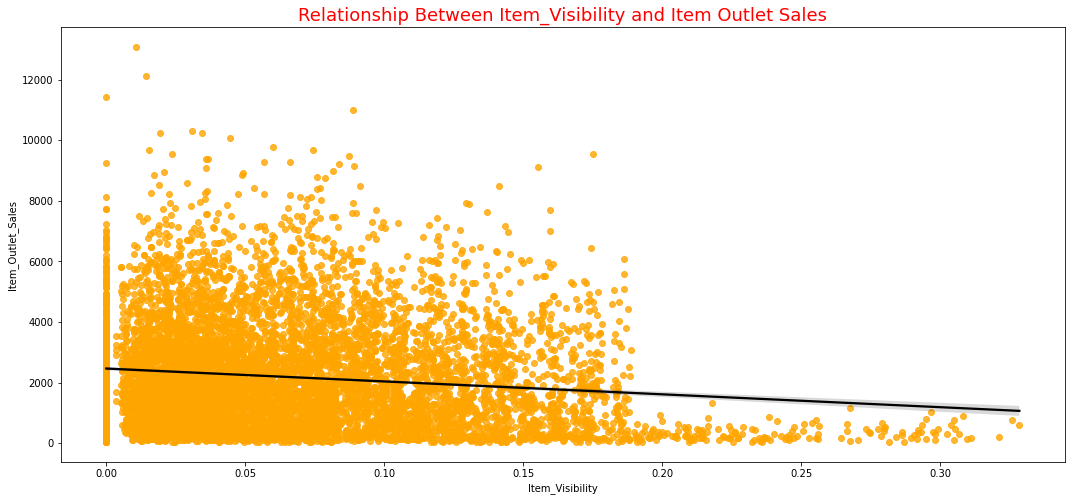

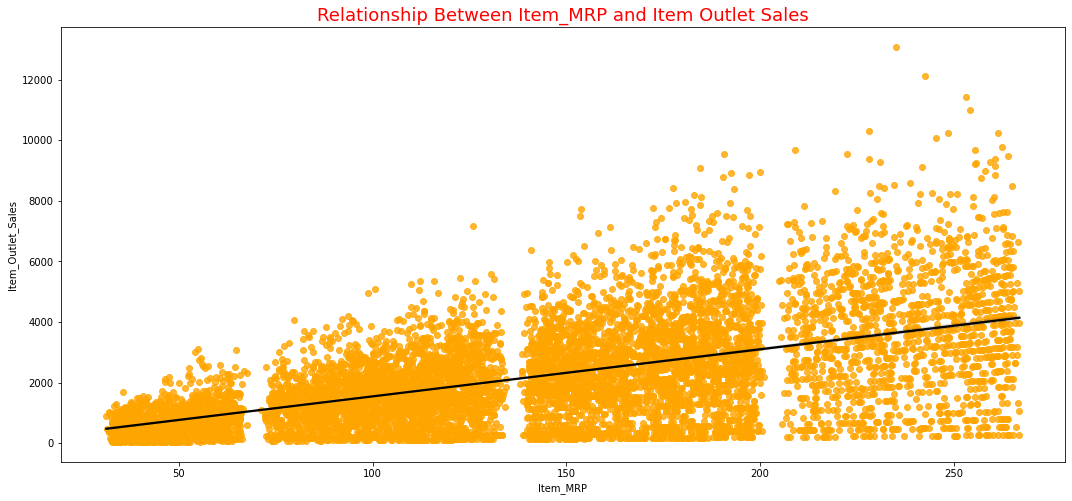

In [30]:
cols=['Item_Weight', 'Item_Visibility', 'Item_MRP']
for col in cols:
    plt.figure(figsize=(18,8))
    sns.regplot(x=col, y='Item_Outlet_Sales', data=train, color='orange', line_kws={'color':'black'});
    plt.title(f"Relationship Between {col} and Item Outlet Sales", fontsize=18, color='red')

<h3 style="color:red; background:lightgreen; line-height:2">Relationship between Item Outlet Sales and different categorical column.</h3>

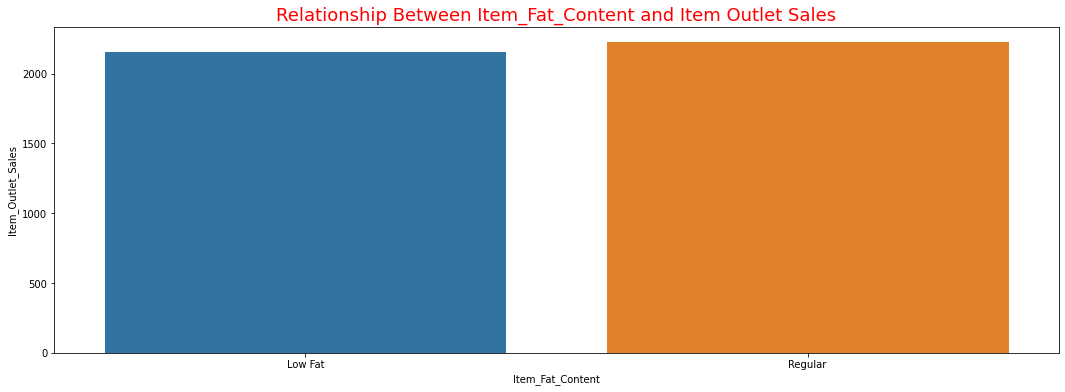

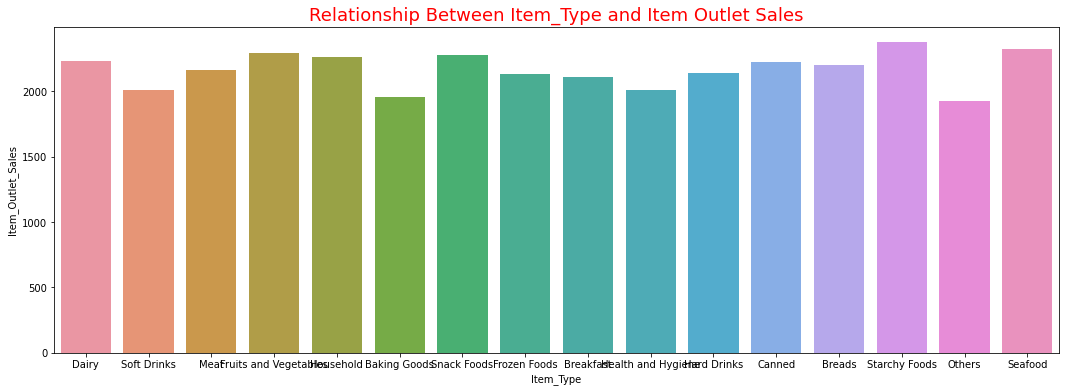

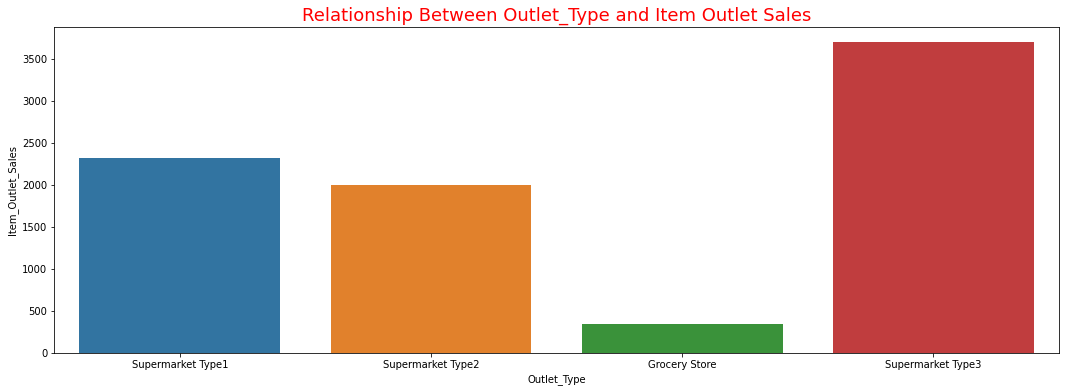

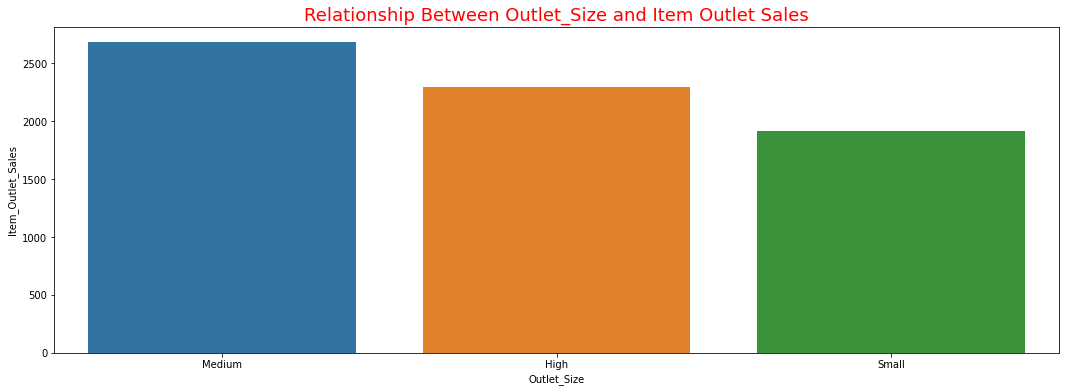

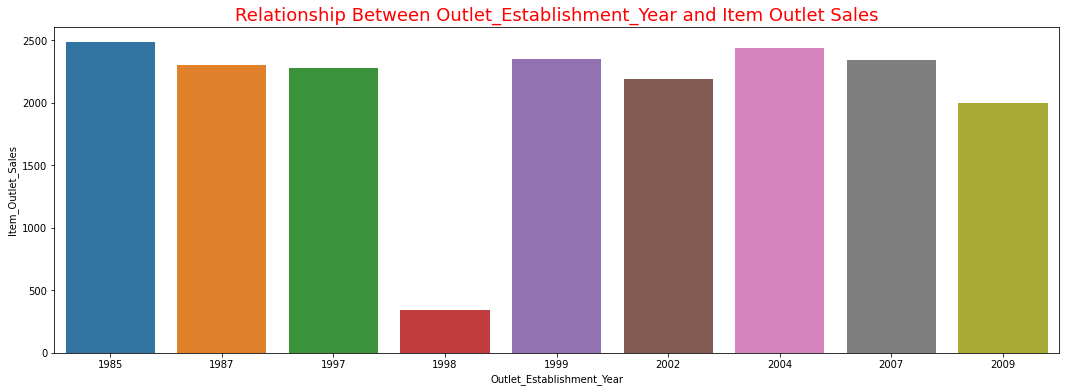

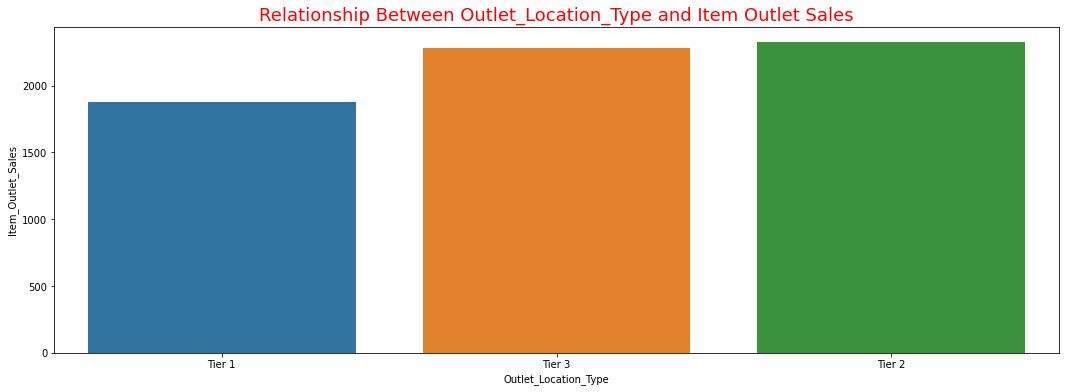

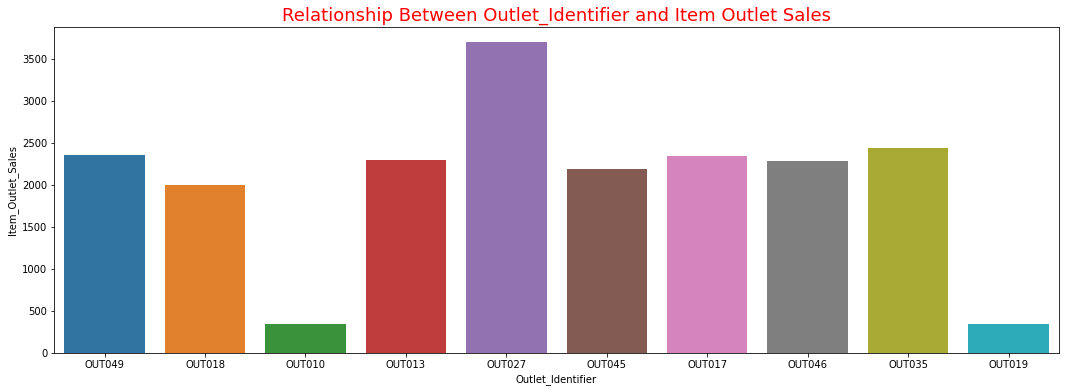

In [31]:
cols=['Item_Fat_Content', 'Item_Type', 'Outlet_Type', 'Outlet_Size', 'Outlet_Establishment_Year',
      'Outlet_Location_Type', 'Outlet_Identifier']
for col in cols:
    plt.figure(figsize=(18,6))
    sns.barplot(x=col, y='Item_Outlet_Sales', data=train, ci=None);
    plt.title(f"Relationship Between {col} and Item Outlet Sales", fontsize=18, color='red')

<h3 style="color:red; background:lightgreen; line-height:2">Categorical Vs Categorical Column Analysis</h3>

In [32]:
pd.crosstab(train['Outlet_Size'], columns=train['Outlet_Location_Type']).T

Outlet_Size,High,Medium,Small
Outlet_Location_Type,,,
Tier 1,0,930,1458
Tier 2,0,0,930
Tier 3,932,1863,0


In [33]:
pd.crosstab(train['Outlet_Size'], columns=train['Outlet_Type']).T

Outlet_Size,High,Medium,Small
Outlet_Type,,,
Grocery Store,0,0,528
Supermarket Type1,932,930,1860
Supermarket Type2,0,928,0
Supermarket Type3,0,935,0


In [34]:
pd.crosstab(train['Item_Type'], columns=train['Item_Fat_Content'])

Item_Fat_Content,Low Fat,Regular
Item_Type,,
Baking Goods,329,319
Breads,140,111
Breakfast,41,69
Canned,341,308
Dairy,418,264
Frozen Foods,450,406
Fruits and Vegetables,630,602
Hard Drinks,214,0
Health and Hygiene,520,0


In [35]:
pd.crosstab(train['Outlet_Identifier'], columns=train['Outlet_Size'])

Outlet_Size,High,Medium,Small
Outlet_Identifier,,,
OUT013,932,0,0
OUT018,0,928,0
OUT019,0,0,528
OUT027,0,935,0
OUT035,0,0,930
OUT046,0,0,930
OUT049,0,930,0


<h2 style="color:blue;">Bivariate Observations:</h2>
<h3 style="color:purple;line-height:1.5">1. As the Item Visibility increases the Item Outlet Sales descreases. Both column are negatively corelated.<br>
    2. Item MRP and Item Outlet Sales have positive corelation, increas in the Item MRP increases the overall Item Sales.<br>
    3. There is no much difference between Item Sales for Low Fat and Regular Fat Item.<br>
    4. Starchy Foods has highest average sales and Baking Goods Item has lowest average sales.<br>
    5. SuperMarket-3 has highest sales among all the outlet types and Grocery type oulet store has comparatevely very low sales.<br>
    6. Medium outlet size store has highest sales and Low Outlet Size stores has lowest sales.<br>
    7. Tier-2 and Tier-3 Outlet Location type stores has almost equal average sales. Sores Located in Tier-1 has lowest sales.<br>
    8. Store names "OUT027" has highest average sales. "OUT019" and "OUT010" has lowest average sales.<br>
    9. No High size Oulet is present in Tier-1 and Tier-2 Locations. No Medium Size Outlet is present in the Tier 2 Location and No Small Size Outlet is present in the Tier-3 Location.<br>
    10. No Grocery Store is of High and Medium Size Oulet. SuperMarket-1 is of all types of size. SuperMarket-2 and SuperMarket-3 are of only Medium size outlet.<br>
    11. Household, Health and Hygiene, Hard Drinks and Others category of Item has no product which contains Regular Fat.<br></h3>

<h3 style="color:blue; background:pink; line-height:2;">Multi-variate Analysis:</h3>

<h3 style="color:red; background:lightgreen; line-height:2">Correlation or Heat-Map to understand the co-relation between all numerical columns.</h3>

In [36]:
num_col=['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']
train[num_col].corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.567574
Item_Outlet_Sales,0.014123,-0.128625,0.567574,1.000000


<Axes: >

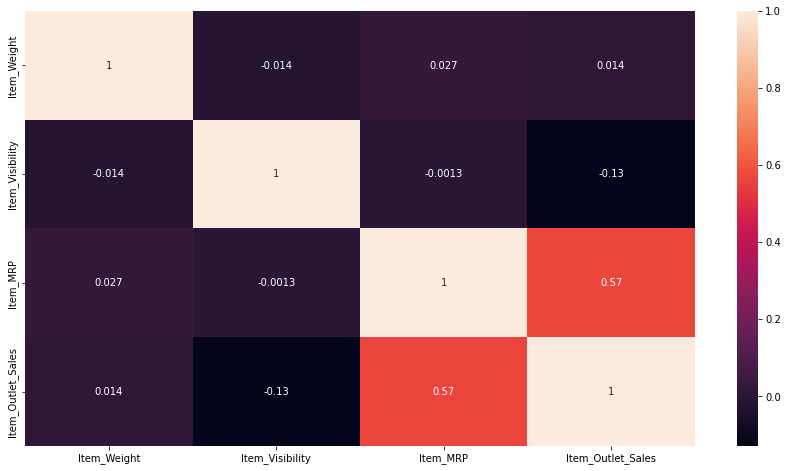

In [37]:
plt.figure(figsize=(15,8))
sns.heatmap(train[num_col].corr(), annot=True)

<h3 style="color:purple;line-height:1.5">Less correlation among all colums, Except Item_MRP and Item_Outlet_Sales.</h3>

<h2 style="color:blue; background:lightblue; line-height:2;">Missing Value Treatement.</h2>

In [38]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<h3 style="color:red; background:lightgreen; line-height:2">Fill Missing values in Item Weight Column</h3>

### For simplicity fill the missing values in the Item_Weight column with Item Weight having same Item Identity.

In [4]:
# Calculate the average weight for each Item_Identifier
average_weight_by_item = train.groupby('Item_Identifier')['Item_Weight'].mean()

# Fill missing values in Item_Weight based on the average weight for each Item_Identifier
train['Item_Weight'] = train.apply(lambda row: average_weight_by_item[row['Item_Identifier']] if pd.isnull(row['Item_Weight']) else row['Item_Weight'], axis=1)

# Verify that missing values are filled
train['Item_Weight'].isnull().sum()

4

### Yet 4 rows are containing missing values, lets have close look on these rows.

In [40]:
train[train['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [41]:
train[train['Item_Identifier']=='FDN52']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564


In [42]:
train[train['Item_Identifier']=='FDK57']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.044,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.228


In [43]:
train[train['Item_Identifier']=='FDE52']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046


In [44]:
train[train['Item_Identifier']=='FDQ60']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


### After careful observation I found out that there are only one entry in this dataset for these Item_Identifier. Lets drop these rows.

In [5]:
# List of index numbers to be dropped
indices_to_drop = [927, 1922, 4187, 5022]

# Drop rows with above indices
train.drop(indices_to_drop, inplace=True)

# Reset the index
train.reset_index(drop=True, inplace=True)

train['Item_Weight'].isna().sum()

0

<h3 style="color:red; background:lightgreen; line-height:2">Fill Missing values in Outlet_Size Column</h3>

In [6]:
# Calculate the mode Outlet_Size for each Outlet_Type
mode_outlet_size_by_type = train.groupby('Outlet_Type')['Outlet_Size'].agg(lambda x: x.mode().iloc[0])

# Fill missing values in Outlet_Size based on the mode for each Outlet_Type
train['Outlet_Size'] = train.apply(lambda row: mode_outlet_size_by_type[row['Outlet_Type']] if pd.isnull(row['Outlet_Size']) else row['Outlet_Size'],axis=1)

print(train['Outlet_Size'].isnull().sum())

0


### Now our data is free of missing values.

<h2 style="color:blue; background:lightblue; line-height:2;">Outlier Treatement.</h2>

### In Univarite analysis we saw that "Item_Visibility" and "Item_Outlet_Sales" column are right skewed. For simplicity I am going to use BoXCox Tranformation to treat outliers.

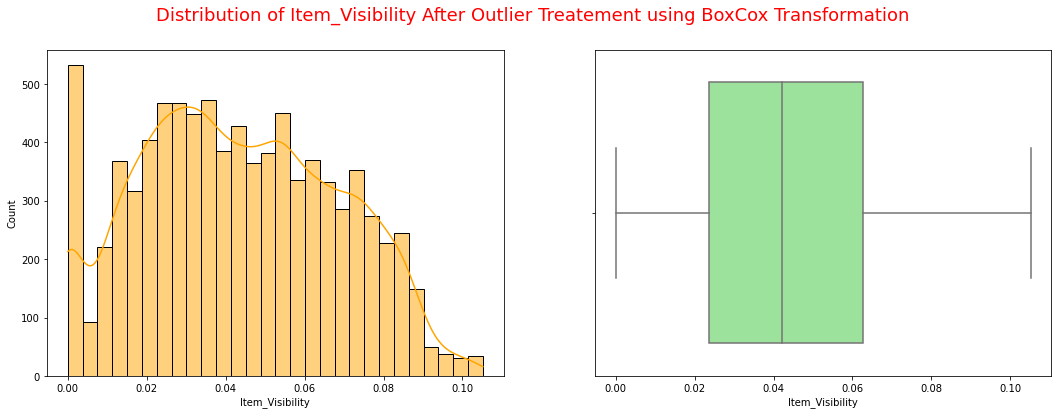

In [7]:
from scipy.stats import boxcox
transformed_visibility, lambda_visibility = boxcox(train['Item_Visibility'] + 1)

train['Item_Visibility'] = transformed_visibility
num_col=['Item_Visibility']

for col in num_col:
    plt.figure(figsize=(18,6))
    plt.subplot(121)
    sns.histplot(x=col, data=train, color='orange', kde=True)
    
    plt.subplot(122)
    sns.boxplot(x=col, data=train, color='lightgreen')
    plt.suptitle(f"Distribution of {col} After Outlier Treatement using BoxCox Transformation", fontsize=18, color="red");

### Now the distribution of data is looking normal.

<h2 style="color:blue; background:lightblue; line-height:2;">Feature Engineering</h2>

<h3 style="color:red; background:lightgreen; line-height:2">Create new feature called "Item_Category" from Item Identifier</h3>

In [48]:
train['Item_Identifier'].nunique()

1555

### Having a large number of categories in a categorical column can lead to the curse of dimensionality problem, which causes increase in model complexity, increases sparity when used one hot encoding, overfitting problem.

In [8]:
train['Item_Category'] = train['Item_Identifier'].str[:2]
train.drop('Item_Identifier', axis=1, inplace=True)
train['Item_Category'] = train['Item_Category'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
train['Item_Category'].value_counts()

Item_Category
Food              6121
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

<h3 style="color:red; background:lightgreen; line-height:2">Create new feature "Outlet_Age" from "Outlet_Establishment_Year".

### This is 2013 data so lets calculate outlet age on 2013.

In [9]:
current_year = 2013
train['Outlet_Age'] = current_year - train['Outlet_Establishment_Year']
train.drop('Outlet_Establishment_Year', axis=1, inplace=True)
train['Outlet_Age'].unique()

array([14,  4, 15, 26, 28, 11,  6, 16,  9], dtype=int64)

<h3 style="color:red; background:lightgreen; line-height:2">Encoding Categorical Features</h3>

In [10]:
#Create dummy variables for 'Item_Category'
Item_Category_dummies = pd.get_dummies(train['Item_Category'], prefix='Item_Category')
Item_Category_dummies=Item_Category_dummies.astype(int)
train = pd.concat([train, Item_Category_dummies], axis=1)
train.drop('Item_Category', axis=1, inplace=True)

#Create dummy variables for 'Item_Fat_Content'
Item_Fat_Content_dummies = pd.get_dummies(train['Item_Fat_Content'], prefix='Item_Fat_Content')
Item_Fat_Content_dummies=Item_Fat_Content_dummies.astype(int)
train = pd.concat([train, Item_Fat_Content_dummies], axis=1)
train.drop('Item_Fat_Content', axis=1, inplace=True)

#Create dummy variables for 'Item_Type'
Item_Type_dummies = pd.get_dummies(train['Item_Type'], prefix='Item_Type')
Item_Type_dummies=Item_Type_dummies.astype(int)
train = pd.concat([train, Item_Type_dummies], axis=1)
train.drop('Item_Type', axis=1, inplace=True)

#Create dummy variables for 'Outlet_Identifier'
Outlet_Identifier_dummies = pd.get_dummies(train['Outlet_Identifier'], prefix='Outlet_Identifier')
Outlet_Identifier_dummies=Outlet_Identifier_dummies.astype(int)
train = pd.concat([train, Outlet_Identifier_dummies], axis=1)
train.drop('Outlet_Identifier', axis=1, inplace=True)

#Create dummy variables for 'Outlet_Size'
Outlet_Size_dummies = pd.get_dummies(train['Outlet_Size'], prefix='Outlet_Size')
Outlet_Size_dummies=Outlet_Size_dummies.astype(int)
train = pd.concat([train, Outlet_Size_dummies], axis=1)
train.drop('Outlet_Size', axis=1, inplace=True)

#Create dummy variables for 'Outlet_Location_Type'
Outlet_Location_Type_dummies = pd.get_dummies(train['Outlet_Location_Type'], prefix='Outlet_Location_Type')
Outlet_Location_Type_dummies=Outlet_Location_Type_dummies.astype(int)
train = pd.concat([train, Outlet_Location_Type_dummies], axis=1)
train.drop('Outlet_Location_Type', axis=1, inplace=True)

#Create dummy variables for 'Outlet_Type'
Outlet_Type_dummies = pd.get_dummies(train['Outlet_Type'], prefix='Outlet_Type')
Outlet_Type_dummies=Outlet_Type_dummies.astype(int)
train = pd.concat([train, Outlet_Type_dummies], axis=1)
train.drop('Outlet_Type', axis=1, inplace=True)

train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Category_Drinks,Item_Category_Food,Item_Category_Non-Consumable,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.014866,249.8092,3735.1380,14,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.017592,48.2692,443.4228,4,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.015475,141.6180,2097.2700,14,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,15,0,1,0,0,1,...,0,0,1,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,26,0,0,1,1,0,...,1,0,0,0,0,1,0,1,0,0


<h2 style="color:blue; background:lightblue; line-height:2;">Data Preprocessing</h2>

<h3 style="color:red; background:lightgreen; line-height:2">Input Output split</h3>

In [11]:
X=train.drop('Item_Outlet_Sales', axis=1)
y=train['Item_Outlet_Sales'].values

<h3 style="color:red; background:lightgreen; line-height:2">Train Test Split</h3>

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

print("X train shape", x_train.shape)
print("X test shape", x_test.shape)
print("Y train shape", y_train.shape)
print("Y test shape", y_test.shape)

X train shape (6815, 45)
X test shape (1704, 45)
Y train shape (6815,)
Y test shape (1704,)


<h3 style="color:red; background:lightgreen; line-height:2">Standardize the numerical columns using StandardScaler</h3>

In [13]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler_fit=scaler.fit(x_train)
x_train_tf=scaler_fit.transform(x_train)
x_test_tf=scaler_fit.transform(x_test)

x_train_tf[:1]

array([[ 0.32299707, -0.57070121, -0.70030476,  1.53886359, -0.32221496,
         0.62379113, -0.47811299, -1.35762191,  1.35762191,  3.50493943,
        -0.18005369, -0.11503144, -0.29128266, -0.29157899, -0.33617926,
        -0.40981949, -0.16090965, -0.25366284, -0.34609696, -0.22737091,
        -0.13780143, -0.0934504 , -0.40369454, -0.23581176, -0.12926305,
        -0.26494287, -0.34689388, -0.34980702, -0.34821975, -0.25529712,
         2.8373341 , -0.35244351, -0.35270655, -0.34848458, -0.34927838,
        -0.34689388,  1.4334169 , -1.14019023, -0.62084152, -0.70205457,
         1.24635099, -0.38103239, -1.37661622, -0.34821975,  2.8373341 ]])

In [14]:
x_test_tf[:1]

array([[ 0.69004423, -0.38253484,  0.0388025 ,  0.10328839, -0.32221496,
         0.62379113, -0.47811299,  0.7365821 , -0.7365821 , -0.28531164,
        -0.18005369, -0.11503144, -0.29128266, -0.29157899, -0.33617926,
        -0.40981949, -0.16090965, -0.25366284, -0.34609696, -0.22737091,
        -0.13780143, -0.0934504 ,  2.47712044, -0.23581176, -0.12926305,
        -0.26494287, -0.34689388, -0.34980702, -0.34821975, -0.25529712,
        -0.35244351, -0.35244351, -0.35270655,  2.86956745, -0.34927838,
        -0.34689388, -0.69763375,  0.87704663,  1.61071701, -0.70205457,
        -0.80234221, -0.38103239,  0.72641887, -0.34821975, -0.35244351]])

<h2 style="color:blue; background:lightblue; line-height:2;">Model Building</h2>

In [15]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error as mse, r2_score as r2, mean_absolute_percentage_error as mape

### Create model dictionary

In [16]:
models={
    "Linear Regresssion":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "Decision Tree":DecisionTreeRegressor(),
    "Support Vector Machine":SVR(),
    "Random Forest":RandomForestRegressor(),
    "Extra Tree":ExtraTreesRegressor(),
    "AdaBoost":AdaBoostRegressor(),
    "Gradient Boost":GradientBoostingRegressor(),
    "XGBoost":XGBRegressor()}

### Fit, Predict and Evaluate the models

In [17]:
result=pd.DataFrame()
for name, model in models.items():
    model.fit(x_train_tf, y_train)
    y_pred=model.predict(x_test_tf)
    rmse=np.sqrt(mse(y_test,y_pred)).round(4)
    r2_score=r2(y_test,y_pred).round(4)
    perc_error=(mape(y_test,y_pred))*100
    results=pd.DataFrame({"Algorithm Name":[name], "RMSE":[rmse], "R2 Score":[r2_score], "Percentage Error":[perc_error]})
    result=pd.concat((result,results))

result

,Algorithm Name,RMSE,R2 Score,Percentage Error
0,Linear Regresssion,1135.3371,0.5522,105.461112
0,Lasso,1136.0167,0.5516,106.054973
0,Ridge,1136.2400,0.5515,106.192919
0,Decision Tree,1512.5306,0.2052,75.052676
0,Support Vector Machine,1689.4232,0.0084,166.158401
0,Random Forest,1119.8975,0.5643,59.175906
0,Extra Tree,1185.9282,0.5114,61.492209
0,AdaBoost,1311.4418,0.4025,160.680506
0,Gradient Boost,1079.4248,0.5952,59.353293
0,XGBoost,1175.6282,0.5198,66.175446


<h3 style="color:red; background:lightgreen; line-height:2">Plotting the algorithm results</h3>

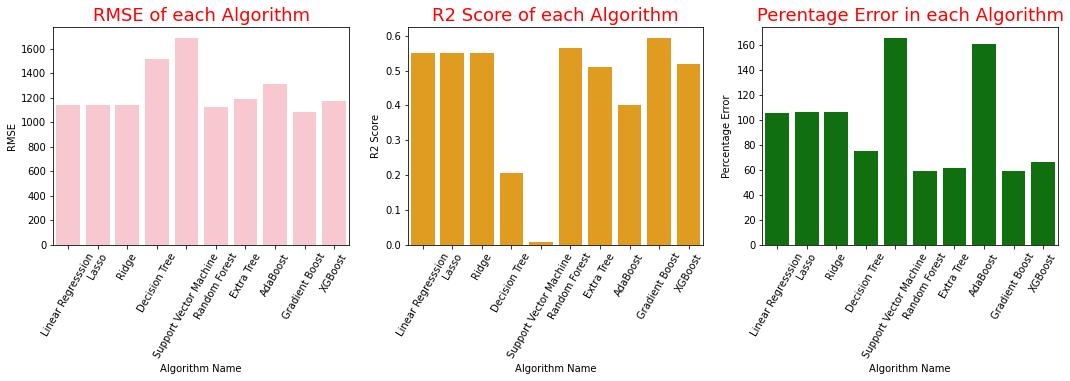

In [18]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.barplot(x='Algorithm Name', y='RMSE', data=result, color='pink')
plt.xticks(rotation=60)
plt.title("RMSE of each Algorithm", fontsize=18, color='red')

plt.subplot(132)
sns.barplot(x='Algorithm Name', y='R2 Score', data=result, color='orange')
plt.xticks(rotation=60)
plt.title("R2 Score of each Algorithm", fontsize=18, color='red')

plt.subplot(133)
sns.barplot(x='Algorithm Name', y='Percentage Error',  data=result, color='green')
plt.xticks(rotation=60)
plt.title("Perentage Error in each Algorithm", fontsize=18, color='red');

### Gradient Boosting is best algorithm to predict the Big Mart Sales.